# 군집 알고리즘

## 과일 사진 데이터 준비하기

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-03-10 06:00:20--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-03-10 06:00:20--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-03-10 06:00:20--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fruits = np.load('fruits_300.npy')

In [5]:
print(fruits.shape)

(300, 100, 100)


배열의 첫번째 차원(300)은 샘플의 개수    
두번째 차원(100)은 이미지 높이   
세번째 차원(100)은 이미지 너비   

즉, 이미지 크기는 100X100

In [6]:
# 첫번째 이미지의 첫번째 행 출력(위에서부터 1/100만큼 한줄)
print(fruits[0, 0, :])

# 흑백 사진이므로 각각 0~255사이의 정숫값을 가짐 

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


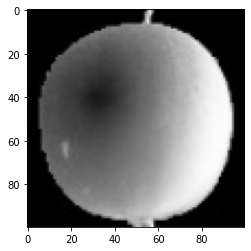

In [7]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

값이 높은 픽셀을 더 중요하게 판단하여 출력한 결과이다.   
즉, 밝은 색을 검게 표현한다.    
원래 사진대로 보고 싶다면 컬러맵을 반전시키면 된다.   

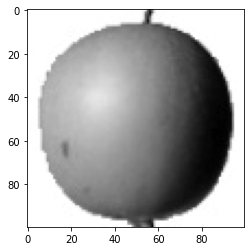

In [8]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

In [9]:
# 넘파이 배열을 실제 이미지로 저장하고 싶을 때 사용하는 코드
import numpy as np
from PIL import Image
im = Image.fromarray(255-fruits[0])
print(type(im)) # == Image 타입
im.save("filename.jpeg")

<class 'PIL.Image.Image'>


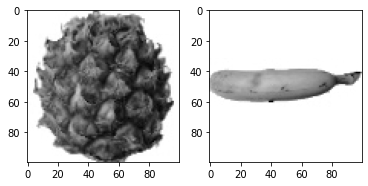

In [10]:
fig, axs = plt.subplots(1, 2)             # 1행 2열의 subplot 그리기
# fig는 전체 틀, axs는 plot 리스트
# plot 속성을 설정할 때 plt를 쓴다
axs[0].imshow(fruits[100], cmap='gray_r') # 100부터 199까지 파인애플
axs[1].imshow(fruits[200], cmap='gray_r') # 200부터 299까지 바나나
plt.show()

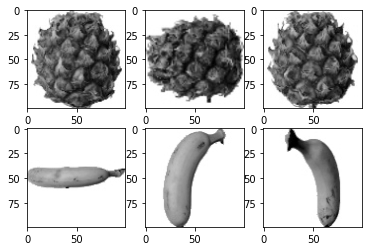

In [11]:
fig, axs = plt.subplots(2, 3)             # 2행 3열의 subplot 그리기
# fig는 전체 틀, axs는 plot 리스트
axs[0,0].imshow(fruits[100], cmap='gray_r')
axs[0,1].imshow(fruits[130], cmap='gray_r')
axs[0,2].imshow(fruits[175], cmap='gray_r')
axs[1,0].imshow(fruits[200], cmap='gray_r')
axs[1,1].imshow(fruits[235], cmap='gray_r')
axs[1,2].imshow(fruits[298], cmap='gray_r')
plt.show()

## 픽셀 값 분석하기

2차원 배열보다 1차원 배열이 분석에 더 빠르다.   
그래서 numpy의 reshape()를 이용해서 2차원(100X100)을 1차원(10000)으로 변환해준다.

In [12]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [13]:
print(apple.shape)  # 100개의 사과 이미지가 길이가 10000인 배열로 변환되었다.
print(apple[0])

(100, 10000)
[1 1 1 ... 1 1 1]


In [14]:
print(apple.mean(axis=1)) # 각 이미지의 평균을 확인, axis=1 열을 따라 

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


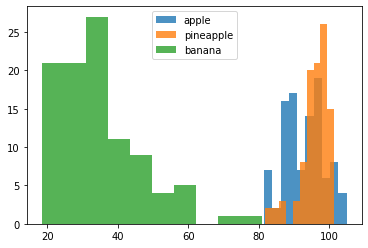

In [15]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)     # alpha로 투명도 조절
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])    # 범례 사용
plt.show()

바나나 사진의 평균값이 40 아래로 집중되어 있고,   
사과와 파인애플은 90~100 사이에 있음.   

그러나 이 기준은 이미지를 서로 구분하기 쉽지 않음.   

전체 샘플의 각 픽셀별 평균값을 비교하자.   
10000개의 픽셀별로 전체 샘플의 평균을 그래프에 표현해보자.

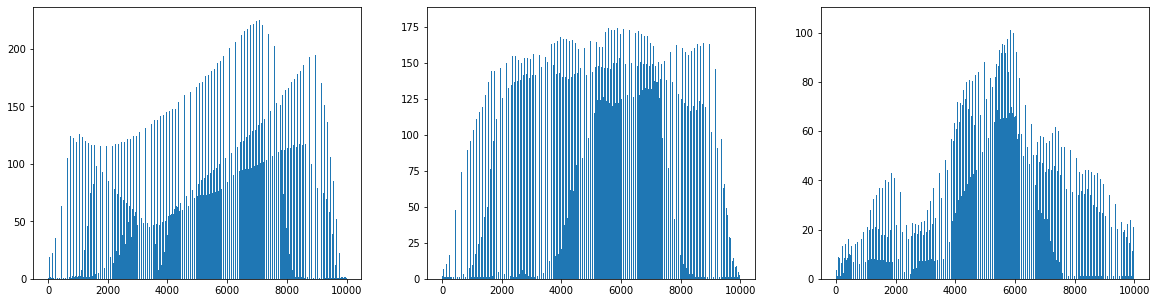

In [16]:
# 참고로 겹쳐진 그래프가 아니라 연속된 바 그래프임!
# 중간중간 규칙적으로 비어보이는 곳은 아마도 이미지의 양쪽끝의 흰 부분일듯
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

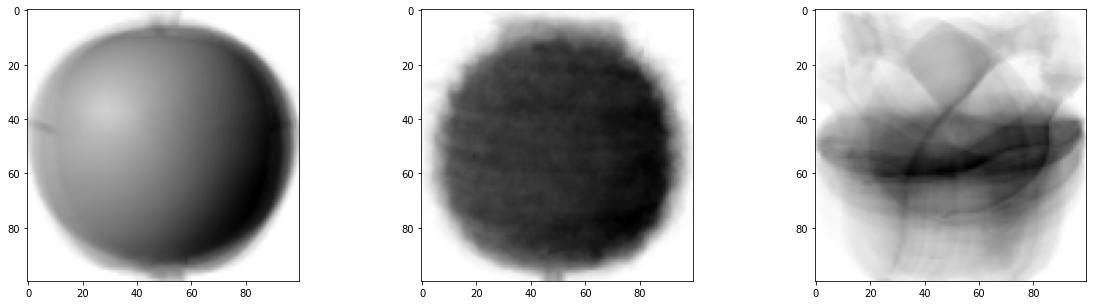

In [17]:
# 픽셀 평균값을 이미지로 출력하여 비교해보자.
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

In [22]:
# abs()는 절댓값을 계산하는 함수 = np.absolute() 
# fruits 전체 이미지에 대해서 각 픽셀의 apple_mean을 빼줌
print(apple_mean.shape)
abs_diff = np.abs(fruits - apple_mean)
print(abs_diff.shape)
print(abs_diff[0])

# 각 이미지의 절댓값 평균(10000픽셀에 대하여) = 즉, 이미지당 하나의 평균값이 나온다
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)
print(abs_mean[:5])

(100, 100)
(300, 100, 100)
[[0.01 0.01 0.01 ... 0.   0.   0.  ]
 [0.01 0.01 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
(300,)
[17.37576  13.508874 17.183394 15.68311  17.983306]


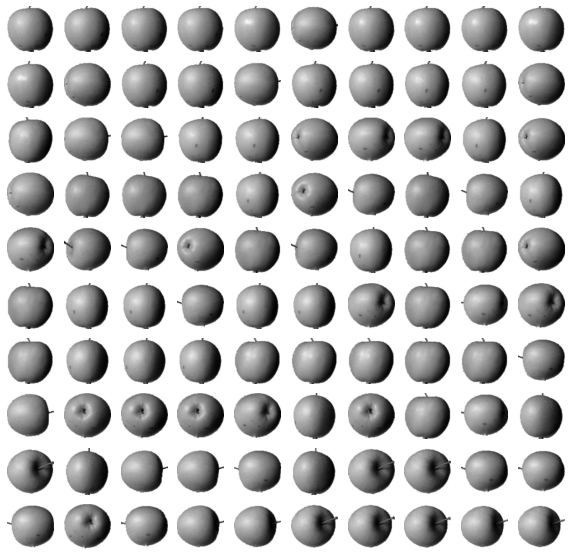

In [19]:
# argsort() 함수는 작은 것에서 큰 순서대로 나열
# 즉, apple_mean과 오차가 가장 작은 샘플 100개
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

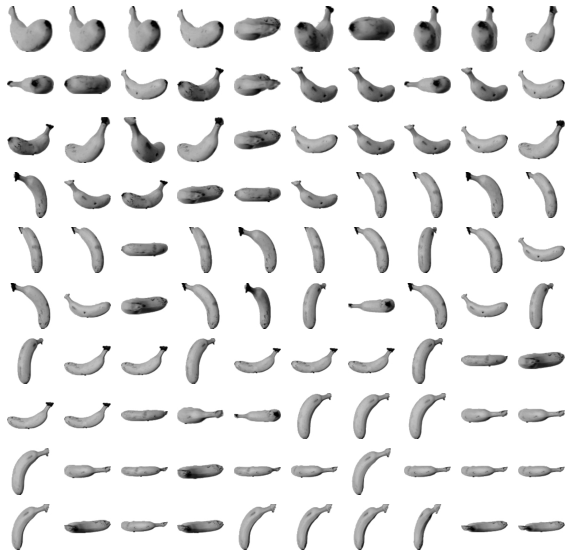

In [20]:
# argsort() 함수는 작은 것에서 큰 순서대로 나열
# 즉, apple_mean과 오차가 가장 작은 샘플 100개
apple_index2 = np.argsort(abs_mean)[200:300]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index2[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

비슷한 샘플끼리 그룹으로 모으는 작업을 '군집(clustering) 알고리즘'    
군집 알고리즘에서 만든 그룹을 '클러스터(cluster)'   

실제 비지도 학습에서는 타깃값을 모르기 때문에 샘플의 평균값을 미리 구할 수 없음 -> k-평균 알고리즘을 통해 이 문제를 해결할 수 있다.

## 확인문제

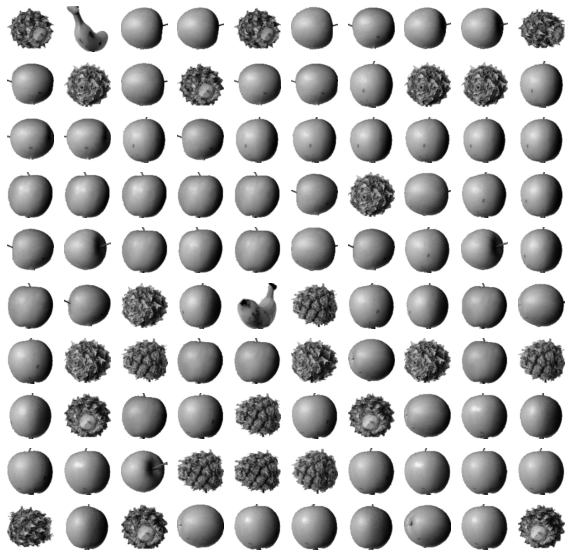

In [21]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[100:200]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()